In [1]:
from google.cloud import bigquery
from google.cloud import storage
from google.oauth2 import service_account
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import os
#os.environ['GOOGLE_APPLICATION_CREDENTIALS']='housedata-311508-48f12327179d.json'

In [2]:
key_path = "housedata-311508-48f12327179d-2.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/bigquery"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

In [3]:
print(credentials.project_id)

housedata-311508


In [4]:
storage_client = storage.Client.from_service_account_json(key_path)
bucket = storage_client.get_bucket("housedatabucket")
blob = bucket.get_blob("home_data.csv")

In [5]:
bt = blob.download_as_string()
s = str(bt, 'utf-8')
s = StringIO(s)
df = pd.read_csv(s)

In [6]:
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.shape

(21613, 21)

In [10]:
df.zipcode.nunique()

70

There are 70 different unique zipcodes from 21613 rows

### Let find mean and median of each colomn of this data set.

In [11]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### Lets try to answer out of dataset of 21613 houses, how many number of bedrooms these houses have. 

The result shows us the most houses are 3 or 4 bedroom houses. We have 9824 three bedroom houses in Washington and 6882 Four Bedroom houses in Washington.

In [12]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Since most house are 3 or 4 bedroom. Lets see average price different of 3 bedroom house vs 4 bedroom house in Washington.

Lets split the df to get df for 3 bedroom houses and 4 bedroom house

In [13]:
df_3bedroom = df.loc[(df.bedrooms == 3) & (df.price.notnull())]
df_3bedroom.shape

(9824, 21)

In [14]:
df_4bedroom = df.loc[(df.bedrooms == 4) & (df.price.notnull())]
df_4bedroom.shape

(6882, 21)

Mean of 3 bedroom house price

In [15]:
df_3bedroom.price.mean()

466232.07949918567

Mean of 4 bedroom house price

In [16]:
df_4bedroom.price.mean()

635419.5050857309

In [17]:
df_4bedroom.price.mean() - df_3bedroom.price.mean()

169187.42558654526

This concludes that on average/mean 4 bedroom house holds 169187 dollars more value than 3 bedroom houses in Washington.

### Let see house sq feet living area of the house affects the price of the house using a scatter graph
This showes us that price of the house increase with how big the house is.

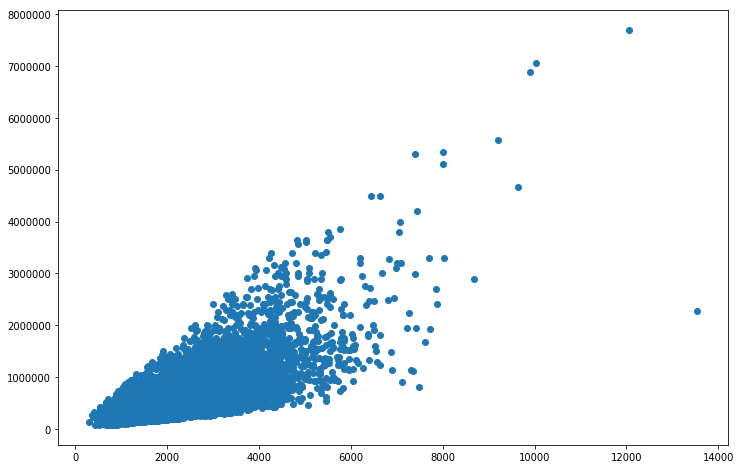

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(df.sqft_living,df.price)
plt.show()

### Let see using scatter graph which zipcodes have most priced houses
This showed us that zipcodes between 98000 and 98050 have highest prices house.

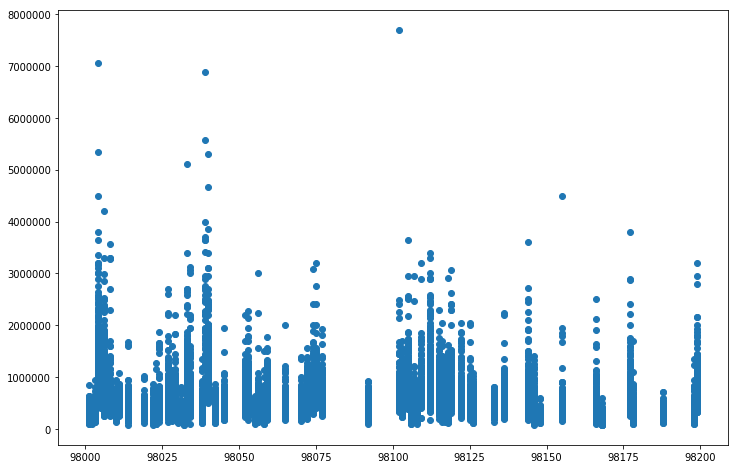

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(df.zipcode,df.price)
plt.show()

### Lets group price of the house by year it was built in and find a mean value for year all the houses were built in. 

In [20]:
grouped_df = df.groupby('yr_built')['price'].mean().reset_index(name='price_mean')

In [21]:
grouped_df

yr_built     price_mean
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544521.984615
112      2012  527447.347059
113      2013  678545.402985
114      2014  683681.760286
115      2015  759785.157895

[116 rows x 2 columns]

Since this dataset contains data from year 1900 to 2015, and it is had to read and compare, to make it easier to read lets draw a bar graph.

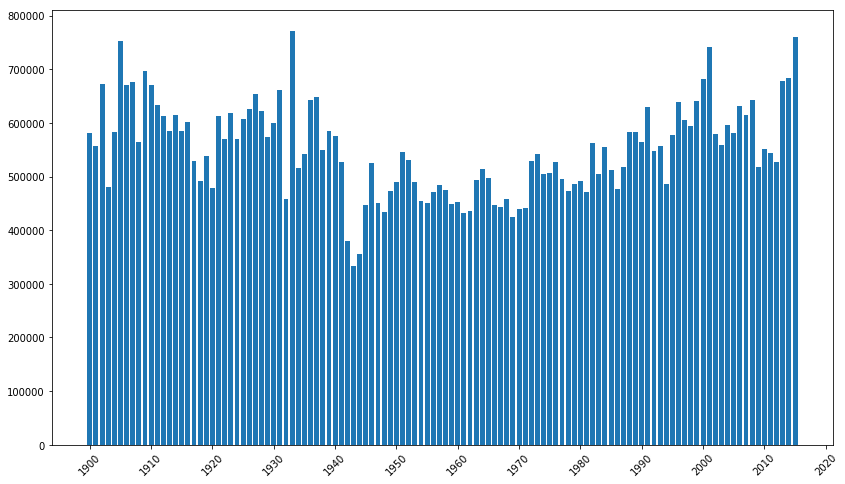

In [22]:
plt.figure(figsize=(14, 8))
plt.bar(grouped_df.yr_built,grouped_df.price_mean)
plt.locator_params(axis="x", nbins=20)
plt.xticks(rotation='45')
plt.show()

In [ ]:
Here we can better see average price distribution of house by year it was built. 